# OpenCV Python Demo


## Installing OpenCV from prebuilt binaries
Install dependencies

```
pip install numpy matplotlib
```

Download the latest OpenCV release from GitHub or SourceForge site and extract.

Goto `opencv/build/python/cv2/python-3` folder.

Copy `cv2.pyd` to `C:/Python3x/lib/site-packages`.

For more information, visit the [docs](https://docs.opencv.org/master/d5/de5/tutorial_py_setup_in_windows.html).

## Installing OpenCV using `pip`
Although this method is not officially supported by [OpenCV](https://opencv.org/), it is well-known and is a lot easier to do. For more information, refer to the [repository](https://github.com/opencv/opencv-python).

Make sure to update `pip` using `pip install --upgrade pip`. Uninstall all existing OpenCV packages before installing a different one using `pip uninstall <package>`.

There are four packages with different purposes.

### Main modules (probably what you want)

```pip install opencv-python```

### Full modules
Click [here](https://docs.opencv.org/master/) for the list of modules.

```pip install opencv-contrib-python```

### Headless main modules
Used for server (headless) environments (Docker, cloud environments etc.). No GUI library dependencies. Relevant if you do not use cv2.imshow et al. or you are using some other package (such as PyQt) than OpenCV to create your GUI.

```pip install opencv-python-headless```

### Headless full modules

```pip install opencv-contrib-python-headless```

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

print(cv2.__version__)

4.5.2


## Working with images
### Image I/O

True

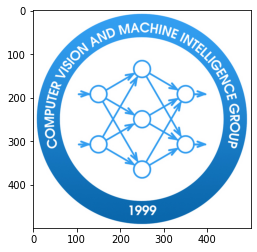

In [2]:
path = r"CVMIG-Logo.jpg"

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
if img is None:
    print("Could not read the image.")

plt.imshow(img)

cv2.imwrite("CVMIG-Logo(copy).jpg", img)

### Image details

In [3]:
height, width, channels = img.shape
print(height, width, channels)

500 500 3


### Image channels

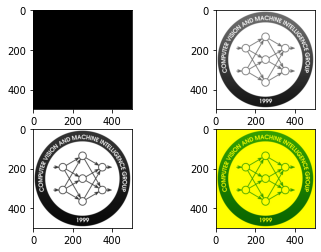

In [4]:
R, G, B = cv2.split(img)

B[:, :] = 0

plt.subplot(221)
plt.imshow(B, 'gray')
plt.subplot(222)
plt.imshow(G, 'gray')
plt.subplot(223)
plt.imshow(R, 'gray')

img_merged = cv2.merge((B, G, R))
img_merged = cv2.cvtColor(img_merged, cv2.COLOR_BGR2RGB)
plt.subplot(224)
plt.imshow(img_merged)

### Color Spaces

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21ca8531c10>)

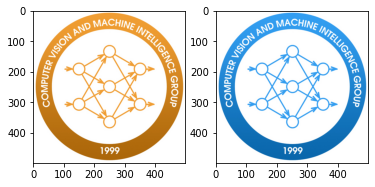

In [5]:
img = cv2.imread(path)
plt.subplot(121), plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(122), plt.imshow(img)

### Drawing

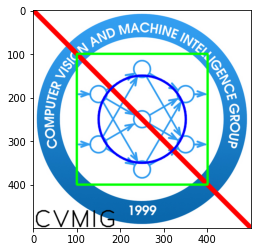

In [6]:
img_draw = img.copy()

cv2.line(img_draw, (0, 0), (width, height), (255, 0, 0),
         thickness=10,
         lineType=cv2.LINE_AA)

cv2.rectangle(img_draw, (100, 100), (width - 100, height - 100), (0, 255, 0),
              thickness=3,
              lineType=cv2.LINE_AA)

cv2.circle(img_draw, (width // 2, height // 2),
           100, (0, 0, 255),
           thickness=3,
           lineType=cv2.LINE_AA)

font = cv2.FONT_HERSHEY_PLAIN

cv2.putText(img_draw,
            "CVMIG", (0, height),
            font,
            4, (0, 0, 0),
            thickness=2,
            lineType=cv2.LINE_AA)

plt.imshow(img_draw)

### Region of interest

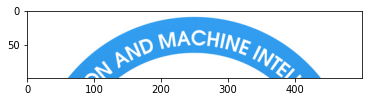

In [7]:
roi = img[0:100, :]

plt.imshow(roi)

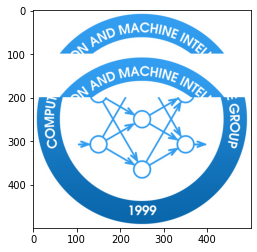

In [8]:
img_paste = img.copy()

img_paste[100:200, :] = roi

plt.imshow(img_paste)

### Padding

(<AxesSubplot:title={'center':'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

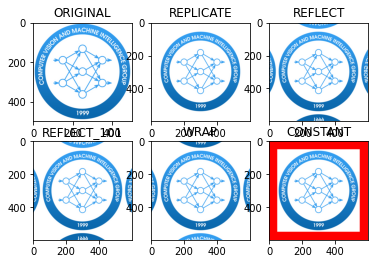

In [9]:
replicate = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,
                              50,
                              50,
                              50,
                              50,
                              cv2.BORDER_CONSTANT,
                              value=(255, 0, 0))

plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')


## Trackbar

In [10]:
def nothing(x):
    pass


cv2.namedWindow('image')

cv2.createTrackbar('test', 'image', 0, 255, nothing)

while True:
    img_trackbar = img.copy()
    test_value = cv2.getTrackbarPos('test', 'image')
    cv2.putText(img_trackbar,
                str(test_value), (0, height),
                font,
                4, (0, 0, 0),
                thickness=2,
                lineType=cv2.LINE_AA)

    cv2.imshow('image', img_trackbar)
    k = cv2.waitKey(1)
    if k == 27:
        break

cv2.destroyAllWindows()

### Geometric transformations
OpenCV provides an affine transformation function, `warpAffine()`, and a perspective warp function, `warpPerspective()`. We could use these functions to do basic geometric transformation to images.

#### Scaling

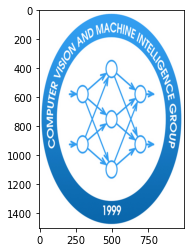

In [11]:
img_scaled = cv2.resize(img, (2 * width, 3 * height), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_scaled)

#### Translation
We use the transformation matrix,
$
M = \begin{bmatrix}
1 & 0 & x \\
0 & 1 & y
\end{bmatrix}
$
where $x$ is horizontal shift and $y$ is the vertical shift.

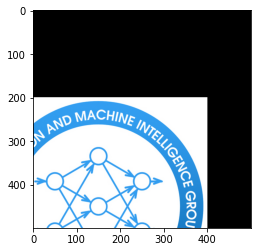

In [12]:
matrix = np.float32([[1, 0, -100], [0, 1, 200]])
img_translate = cv2.warpAffine(img, matrix, (width, height))

plt.imshow(img_translate)

#### Rotation
We can simply use the convenience function, `getRotationMatrix2D(center, angle, scale)`, where angle is in degrees.

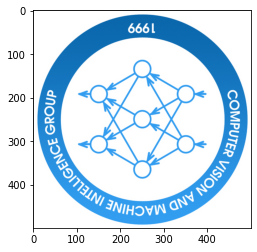

In [13]:
matrix = cv2.getRotationMatrix2D((width // 2, height // 2), 180, 1)
img_rotate = cv2.warpAffine(img, matrix, (width, height))

plt.imshow(img_rotate)

#### Affine transformation
There are a lot more things you can do using affine transformation. For more transformation matrices that you can use, visit the [Wikipedia page](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation).

#### Perspective Transform

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21caa4c38b0>)

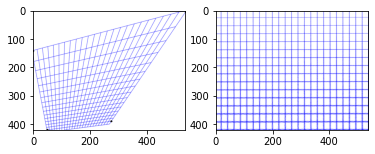

In [14]:
img_per = cv2.imread("perspective.png")
img_per = cv2.cvtColor(img_per, cv2.COLOR_BGR2RGB)

per_height, per_width = img_per.shape[:2]

pts1 = np.float32([[0, 143], [per_width - 1, 6], [50, per_height - 1], [274, 389]])
pts2 = np.float32([[0, 0], [per_width - 1, 0], [0, per_height - 1],
          [per_width - 1, per_height - 1]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
img_per_transform = cv2.warpPerspective(img_per, matrix,
                                        (per_width, per_height))

for point in pts1:
    cv2.circle(img_per, list(map(int, point.tolist())), 2, (0, 0, 0), thickness=2, lineType=cv2.LINE_AA)

plt.subplot(121), plt.imshow(img_per)
plt.subplot(122), plt.imshow(img_per_transform)

### Canny Edge Detection
A popular edge detection algorithm. OpenCV provides the function `Canny(image, minVal, maxVal)`.

#### Hysteresis Thresholding
There are two threshold values, `minVal` and `maxVal`. Any edge above `maxVal` are considered "*sure-edge*". These are determined to be certainly an edge. Any edge below `minVal` are disregared. All edges between `minVal` and `maxVal` are determined to be an edge if it's connected to a *sure-edge*.

![hysteresis](hysteresis.jpg)

Observe that edge `B` is not connected to a *sure-edge*. Thus, it is determined to be not an edge.

While edge `C` is connected to the *sure-edge* `A` which makes edge `C` to be determined as an edge as well.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21cae1e7250>)

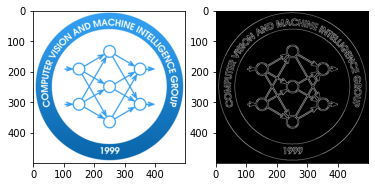

In [15]:
edges = cv2.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(edges, 'gray')

### Line Detection

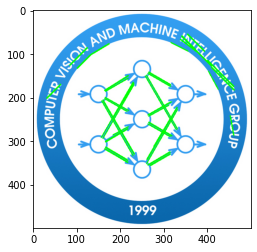

In [16]:
edges = cv2.Canny(img, 100, 200)

lines = cv2.HoughLinesP(edges,
                        1,
                        np.pi / 180,
                        70,
                        minLineLength=30,
                        maxLineGap=5)

img_line = img.copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_line, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img_line)

### Circle Detection

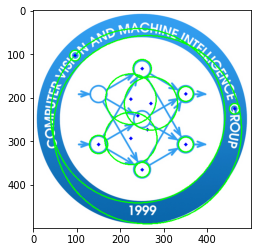

In [17]:
circles = cv2.HoughCircles(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY),
                           cv2.HOUGH_GRADIENT,
                           1,
                           40,
                           param1=100,
                           param2=60,
                           minRadius=0,
                           maxRadius=0)

img_circle = img.copy()
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(img_circle, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(img_circle, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(img_circle)


## Working with Videos

In [18]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()

    cv2.imshow('frame', frame)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Quick applications

### Hue keying

In [11]:
def set_color(new_color):
    global color, lower_color, upper_color
    color = cv2.cvtColor(np.uint8([[new_color]]), cv2.COLOR_BGR2HSV)[0, 0]
    lower_color = np.copy(color)
    lower_color[0] -= 10
    lower_color[1] = 20
    lower_color[2] = 100
    upper_color = np.copy(color)
    upper_color[0] += 10
    upper_color[1] = 255
    upper_color[2] = 255

color = None
lower_color = None
upper_color = None
set_color([0, 255, 0])

# mouse callback function
def update_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        global frame
        color_area = frame[y - 3:y + 3, x - 3:x + 3]
        color = np.average(np.average(color_area, axis=0), axis=0)
        set_color(color)

cv2.namedWindow('frame')
cv2.setMouseCallback('frame', update_color)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 1)
while True:
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_color, upper_color)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.rectangle(frame, (0, 0), (10, 10),
                  cv2.cvtColor(np.uint8([[color]]),
                               cv2.COLOR_HSV2BGR)[0, 0].tolist(),
                  thickness=-1)
    cv2.rectangle(frame, (10, 0), (20, 10),
                  cv2.cvtColor(np.uint8([[lower_color]]),
                               cv2.COLOR_HSV2BGR)[0, 0].tolist(),
                  thickness=-1)
    cv2.rectangle(frame, (20, 0), (30, 10),
                  cv2.cvtColor(np.uint8([[upper_color]]),
                               cv2.COLOR_HSV2BGR)[0, 0].tolist(),
                  thickness=-1)

    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Foreground Extraction (using GrabCut algorithm)

In [10]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 1)

fact = 0.4

rect = [
    10, 10,
    int(fact * cap.get(cv2.CAP_PROP_FRAME_WIDTH)) - 20,
    int(fact * cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) - 20
]

def update_rect(event, x, y, flags, param):
    global rect
    if event == cv2.EVENT_LBUTTONDOWN:
        rect[:2] = x, y

    if event == cv2.EVENT_LBUTTONUP:
        rect[2:4] = max(x - rect[0], 10), max(y - rect[1], 10)


cv2.namedWindow('frame')
cv2.setMouseCallback('frame', update_rect)

while True:
    _, frame = cap.read()
    frame = cv2.resize(frame, (int(fact * cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                               int(fact * cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    mask = np.zeros(frame.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    cv2.grabCut(frame, mask, rect, bgdModel, fgdModel, 2,
                cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    frame = frame * mask2[:, :, np.newaxis]

    cv2.rectangle(frame, rect[:2], (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), thickness=2)

    cv2.imshow('frame', frame)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Background subtraction

In [9]:
backSub = cv2.createBackgroundSubtractorMOG2(detectShadows=False)
capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_EXPOSURE, 0)

while True:
    _, frame = capture.read()
    k = cv2.waitKey(1)

    fgMask = backSub.apply(frame, -1 if k == ord(' ') else 0)

    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)

    if k == 27:
        break

capture.release()
cv2.destroyAllWindows()

## Other Resources
- [OpenCV documentation](https://docs.opencv.org/master/index.html)
- [GeekforGeeks OpenCV python tutorial](https://www.geeksforgeeks.org/opencv-python-tutorial/)
- [OpenCV github](https://github.com/opencv)